# Credit risk modeling using Machine Learning

#### 
This project aims to predict a customer's credit risk (good or bad payer) from their socio-economic information, using supervised machine learning techniques.
####
The main goal is to undersatnd the factors influencing payment default

## Pipelines
1. Data and Packages importation
2. Data processing
    - Data Cleaning
    - Univariate analysis
    - Bivariate analysis
    - Transformation of data
3. Modeling
   - Logistic regression
   - DecisionTree
   - Extra Trees
   - Random Forest
   - XGBoost

## 1. Data and packages importation

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


## 2. Data processing

In [4]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

#### a- Data Cleaning

In [5]:
df.isnull().sum().sum()

np.int64(577)

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(1000, 11)

In [9]:
pourcentage_na = df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100
pourcentage_na

np.float64(5.245454545454545)

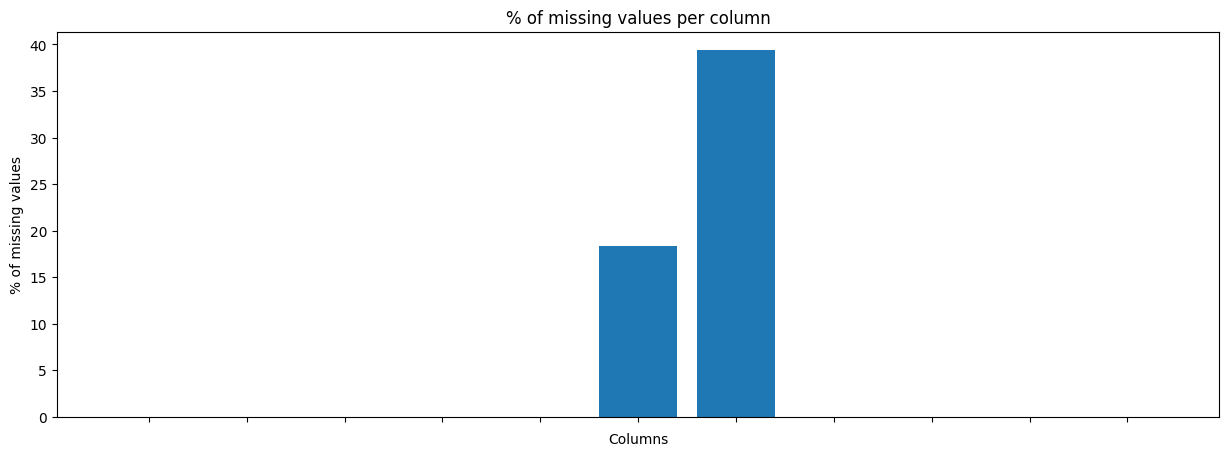

In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.bar(df.columns, df.isna().sum()/df.shape[0]*100)
axes.set_title('% of missing values per column')
axes.set_xlabel('Columns')
axes.set_ylabel('% of missing values')
axes.set_xticklabels([])  # Hide x-axis labels
plt.show()

In [11]:
df = df.dropna().reset_index(drop=True)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [12]:
df.isna().sum().sum()

np.int64(0)

#### b- Univariate data analysis

In [13]:
df.drop(columns = "Unnamed: 0", inplace=True)


In [14]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


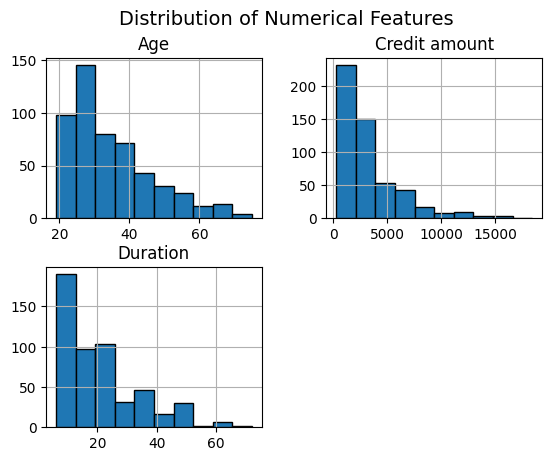

In [15]:

df[["Age", "Credit amount", "Duration"]].hist(bins=10, edgecolor= "black")
plt.suptitle("Distribution of Numerical Features", fontsize= 14)
plt.show()

In [28]:
var_num = df[["Age", "Job","Credit amount", "Duration"]]

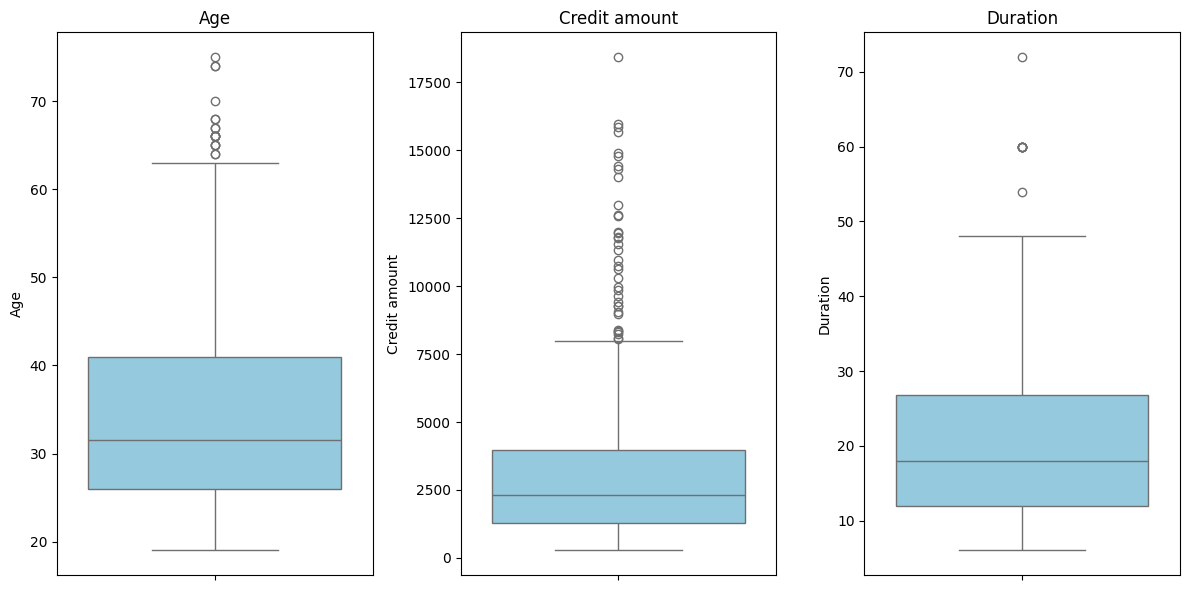

In [17]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()

plt.show()


In [18]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [20]:
var_cat = df[["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]]

C:\Users\weuz2\AppData\Local\Temp\ipykernel_17352\2296178066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order= df[col].value_counts().index)
C:\Users\weuz2\AppData\Local\Temp\ipykernel_17352\2296178066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order= df[col].value_counts().index)
C:\Users\weuz2\AppData\Local\Temp\ipykernel_17352\2296178066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order= df[col].value_counts().in

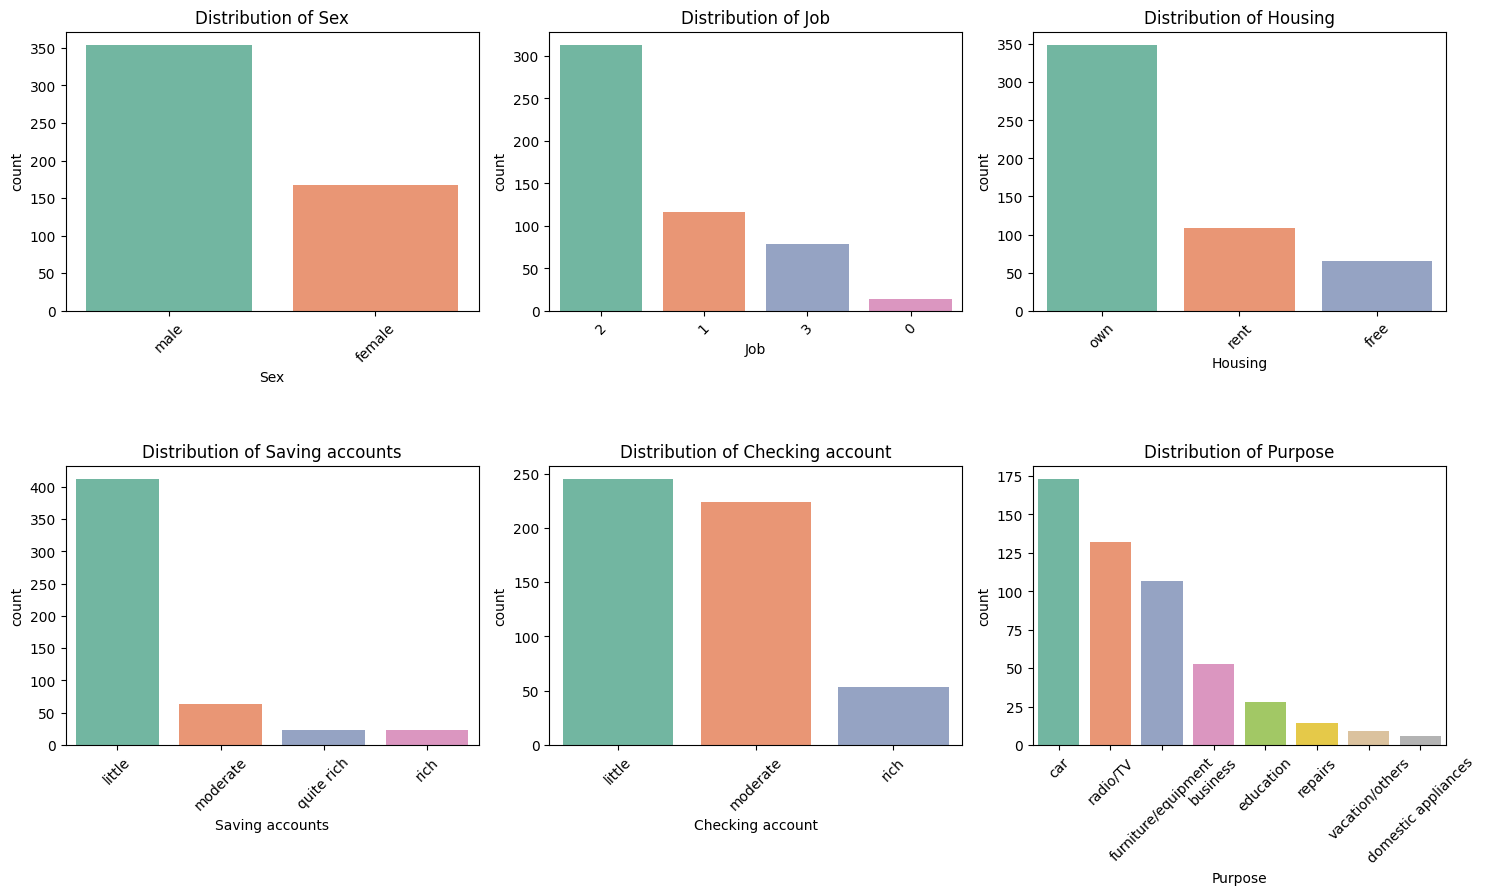

In [26]:
plt.figure(figsize=(15,12))
for i, col in enumerate(var_cat):
    plt.subplot(3,3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order= df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
corr = var_num.corr()

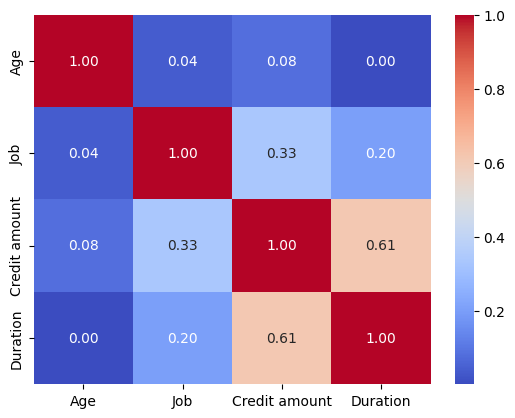

In [35]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#### c-Bivariate data analysis

In [36]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [37]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [38]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


In [46]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

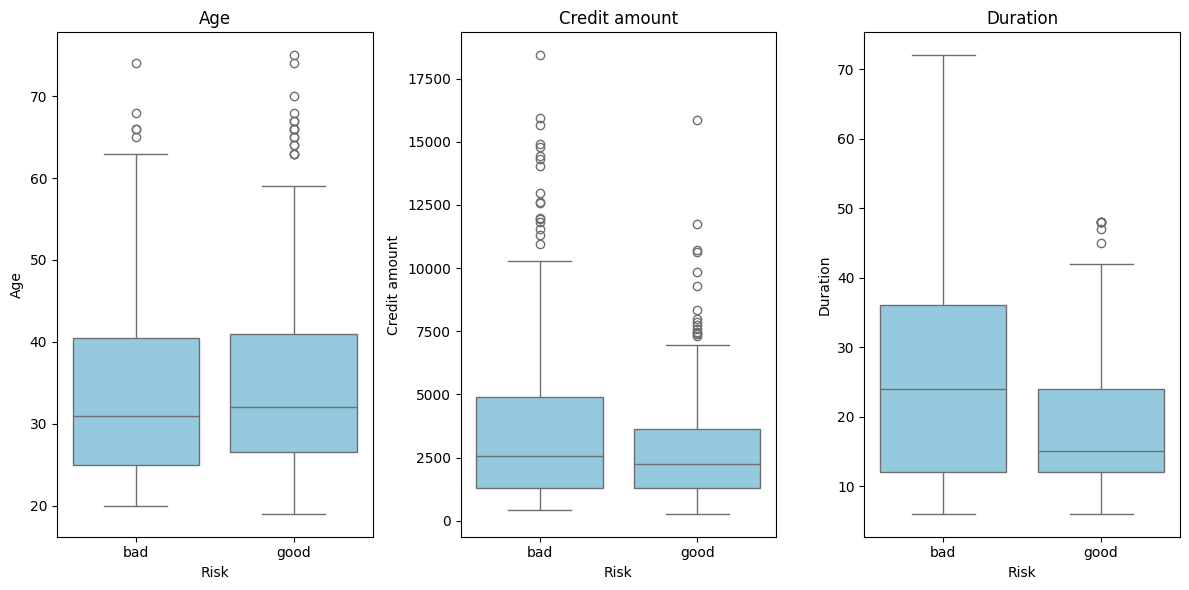

In [50]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df, x="Risk", y=col, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


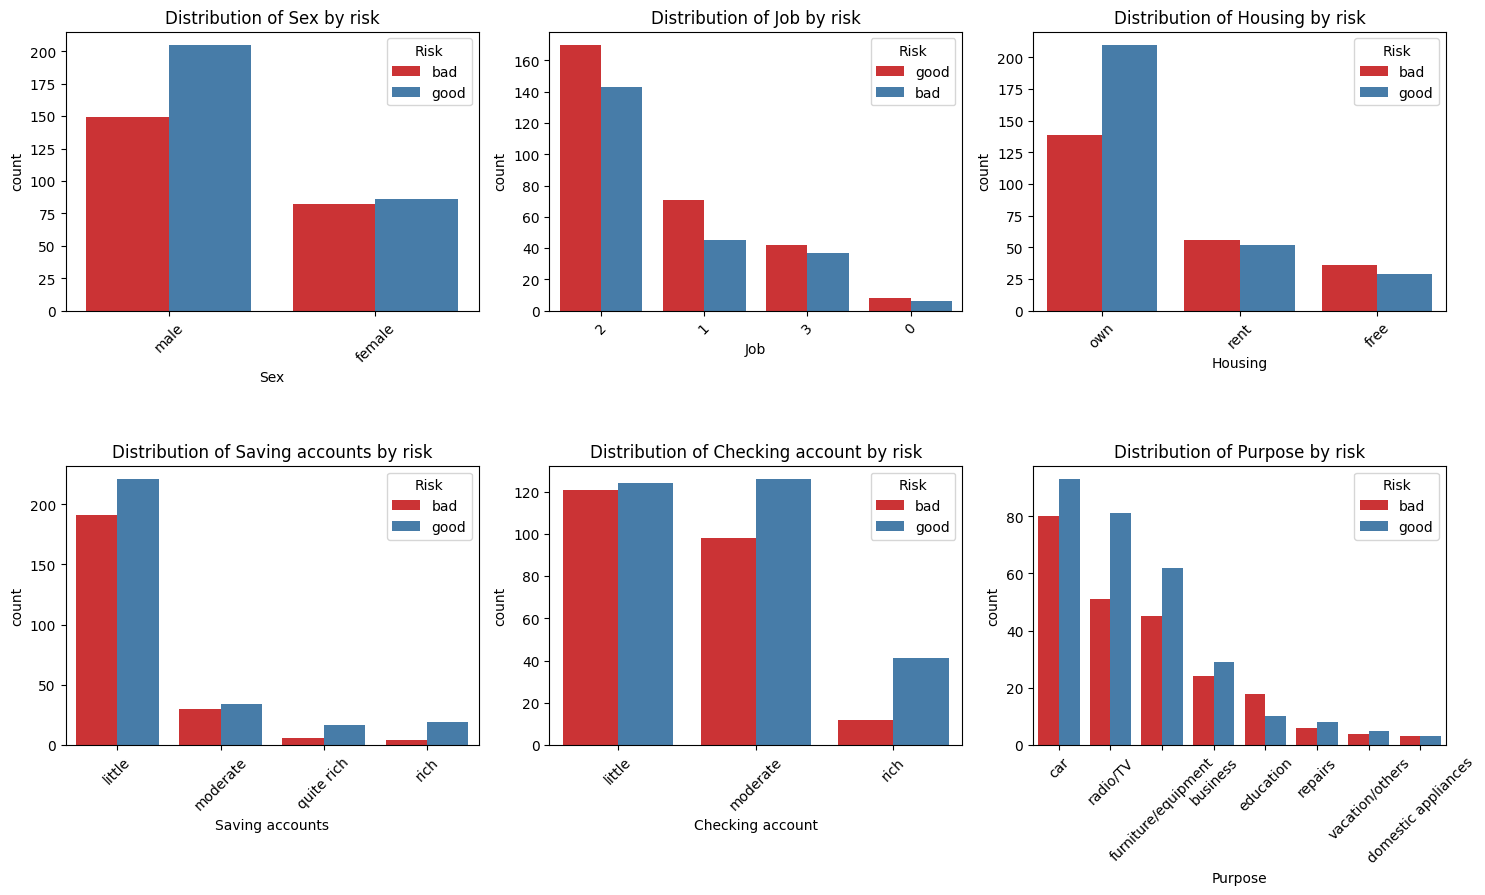

In [52]:
plt.figure(figsize=(15,12))
for i, col in enumerate(var_cat):
    plt.subplot(3,3, i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order= df[col].value_counts().index)
    plt.title(f"Distribution of {col} by risk")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### d- Data Transformation

In [53]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [54]:
df_model = df.drop("Purpose", axis=1)
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [58]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [59]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [60]:
le_dict = {}

In [102]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encode.pkl")

In [64]:
le_target = LabelEncoder()
target= "Risk"

In [65]:
df_model[target] = le_target.fit_transform(df_model[target])
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [66]:
### 1 is Good risk and 0 is bad risk

## 3. Modeling with Machine Learning

In [69]:
X = df_model.drop("Risk", axis=1)
y = df_model[target]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [72]:
X_train.shape

(417, 8)

In [73]:
X_test.shape

(105, 8)

In [81]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

#### a- Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
score = model.score(X_test, y_test)
score
#y_pred = clf.predict(X_test)

C:\Users\weuz2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.638095238095238

#### b- Decision Tree

In [84]:
dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt_param_grid = {
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [85]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test) 

In [88]:
print(f"Decision Tree accuracy: {acc_dt}")
print(f"Best parameters: {params_dt}")

Decision Tree accuracy: 0.580952380952381
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### c- Random Forest

In [89]:
randomForest = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
randomForest_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [90]:
best_rf, acc_rf, params_rf = train_model(randomForest, randomForest_param_grid, X_train, y_train, X_test, y_test)

In [92]:
print(f"Random Forest accuracy: {acc_rf}")
print(f"Best parameters: {params_rf}")

Random Forest accuracy: 0.6190476190476191
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


#### d- Extra Trees

In [94]:
extraTree = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
extraTree_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [96]:
best_et, acc_et, params_et = train_model(extraTree, extraTree_param_grid, X_train, y_train, X_test, y_test)
print(f"Extra Trees accuracy: {acc_et}")
print(f"Best parameters: {params_et}")

Extra Trees accuracy: 0.6476190476190476
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


#### e-XGB

In [97]:
xgb = XGBClassifier(random_state=1, scale_pos_weight = (y_train==0).sum() / (y_train==1).sum(), use_label_encoder = False, eval_metric = "logloss")

In [98]:
xgb_param_grid= {
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample" : [0.7,1],
    "colsample_bytree": [0.7,1]
}

In [99]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)
print(f"XGBoost accuracy: {acc_xgb}")
print(f"Best parameters: {params_xgb}")

XGBoost accuracy: 0.6761904761904762
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


C:\Users\weuz2\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:54:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [100]:
best_xgb.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [101]:
joblib.dump(best_xgb, "xgboost_credit_model.pkl")

['xgboost_credit_model.pkl']